In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="https://raw.githubusercontent.com/malkaguillot/Foundations-in-Data-Science-and-Machine-Learning/refs/heads/main/docs/utils/custom.css">
%%HTML
<link rel="stylesheet" type="text/css" href="../utils/custom.css">

## Foundations in Data Science and Machine Learning
# Module 5b: Machine Learning - Classifications
### [Malka Guillot](https://malkaguillot.github.io/)

<img src="../utils/img/logo-hsg.png" alt="HSG Logo" style="position: relative; bottom: 50px; left: 600px; width: 100px;">


### Classification Framework

-   Response/target variable $y$ is **qualitative** (or
    **categorical**):

    -   2 categories $\rightarrow$ binary classification

    -   More than 2 categories $\rightarrow$ multi-class classification

-   Features $X$:

    -   can be high-dimensional

-   We want to assign a class to a **quantitative response**

    $\rightarrow$ probability to belong to the class

-   **Classifier**: An algorithm that maps the input data to a specific
    category.

-   Performance measures specific to classification

### Classification process

1. Model probability
   -  Probability of belonging to a category
        $$P(y=1 \mid X)$$


2. Predict probability
   - rely on this probability to assign a class to the observation.
    -   For example, we can assign the class $1$ for all observations
        where $P(y = 1 | x) > 0.5 $
    -   But we can also select a different **threshold**.


3. We can make errors   
   - False negative
   - False positive

### Confusion Matrix
- For comparing the predictions of the fitted model to the actual classes.

- After applying a classifier to a data set with known labels *Yes* and *No*:
<table>
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" style="text-align: center;"><strong>Truth</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td>Negative</td>
      <td>Positive</td>
    </tr>
    <tr>
    <td rowspan="2" style="vertical-align: middle; text-align: center;"><strong>Prediction</strong></td>
      <td>Negative</td>
      <td style="color:#90EE90;"><em>True negative</em> (TN)</td>
      <td style="color: blue;"><em>False negative</em> (FN)</td>
    </tr>
    <tr>
      <td>Positive</td>
      <td style="color: orange;"><em>False positive</em> (FP)</td>
      <td style="color: green;"><em>True positive</em> (TP)</td>
    </tr>
    <tr>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table>

Note that $TP+TN+FP+TP=N$, where $N$ is the number of observations. 


The confusion matrix shows the number of observations by their predicted class and actual classes.

- Correctly classified: TP \& TN
- Incorrectly classified: FP \& FN


### Precision and Recall

-   <bcolor>Accuracy </bcolor>: Proportion of rightly guessed observations
    -   $  \frac{ \color{green}{\text{True Positives}} + \color{#90EE90}{\text{True Negative}}} {N}$

-   <bcolor>Precision</bcolor>: accuracy of positive predictions
    -   $  \frac{ \color{green}{\text{True Positives}}} {\color{green}{\text{True Positives}} +  \color{orange}{\text{False Positives}}}$

    -   decreases with false positives.

-   <bcolor>Recall</bcolor>: proportion of true positives among all actual positives
    -   $  \frac{\color{green}{\text{True Positives}}}{\color{green}{\text{True Positives}} +  \color{blue}{\text{False Negatives}}}$

    -   decreases with false negatives.



### F1 Score

-   The $F_{1}$ score provides a single combined metric it is the **harmonic mean** of precision and recall

    $$\begin{aligned}
    F_{1} &= \frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}
    = 2\times\frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}} \\\\
    &=  \frac{\text{Total Positives}}{\text{Total Positives}+\frac{1}{2}(\text{False Negatives}+\text{False Positives})}
    \end{aligned}$$

-   The harmonic mean gives **more weight to low values**.

-   The F1 score values precision and recall **symmetrically**.



### Logistic Regression

<img src="images/sigmoid.png"  style="height: 130px; position:relative;background-color:white;     margin-left: auto;margin-right: auto;display: block" >

-   Prediction:

$$\hat{y} = 
\begin{cases}
    0 & \textrm{ if } \hat{p}<.5 \\\\
    1 & \textrm{ if } \hat{p}\geq.5
\end{cases}
$$


### Logistic Regression Cost Function

-   The cost function to minimize is
<img src="./images/log-reg-cost-function.png"  style="height: 130px; position:relative;background-color:white;     margin-left: auto;margin-right: auto;display: block" >

  -   this does not have a closed form solution

  -   but it is convex, so gradient descent will find the global
      minimum.

-   Just like linear models, logistic can be regulared with L1 or L2
    penalties, e.g.:
    $$J_{2}(\theta)=J(\theta)+\alpha_{2}\frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2}$$


<h2 style="color: blue;"> Implementation of the logistic regression</h2>

## 

In [2]:
import numpy as np
import pandas as pd
# import patsy

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

import seaborn as sns
import matplotlib.pyplot as plt

### Load & visualise data

In [3]:
df=pd.read_csv("../../data/beers.csv")
df.shape

(225, 5)

In [4]:
df.head()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
0,3.739295,0.422503,0.989463,0.215791,0
1,4.207849,0.841668,0.928626,0.380420,0
2,4.709494,0.322037,5.374682,0.145231,1
3,4.684743,0.434315,4.072805,0.191321,1
4,4.148710,0.570586,1.461568,0.260218,0


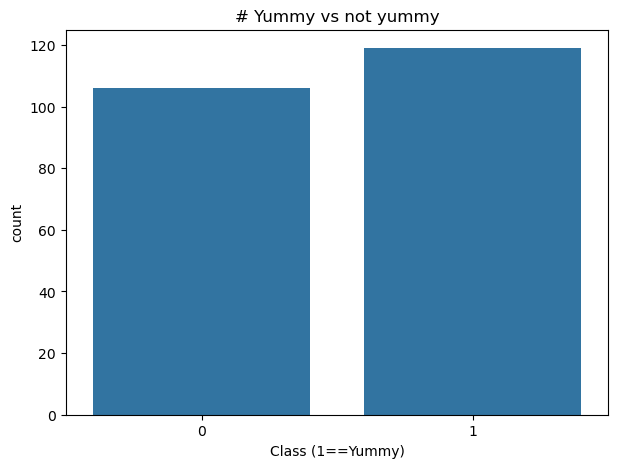

In [5]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='is_yummy', data=df)
_ = plt.title('# Yummy vs not yummy')
_ = plt.xlabel('Class (1==Yummy)')

#### Prepare data: split features and labels

In [6]:
# all columns up to the last one:
X = df.iloc[:, :-1]
# only the last column:
y = df.iloc[:, -1]

### Splitting into Training and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Model Building and Training 

#### Creating the pipeline

Before we build the model, 
1. we use the standard scaler function to scale the values into a common range. 
2. Next, we create an instance of LogisticRegression() function for logistic regression.

We are not passing any parameters to `LogisticRegression()` so it will assume default parameters. Some of the important parameters you should know are –

- **penalty**:  It specifies the norm for the penalty
  - Default = L2 

- **C**:  It is the inverse of regularization strength
  - Default = 1.0 

- **solver**: It denotes the optimizer algorithm
  - Default = ‘lbfgs’

We are making use of `Pipeline` to create the model to streamline standard scalar and model building.

In [8]:
scaler = StandardScaler()

lr = LogisticRegression(max_iter=10000, solver='lbfgs') #syntax if you wand to add hyperparameters

model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)
                  ])
model1

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=10000))])

#### Fit our model to the training data

In [9]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [10]:
model1.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=10000))])>

#### Predictions for the class and for the probabilities

In [11]:
y_train_hat = model1.predict(X_train) # predicting on the training set
y_train_hat[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [12]:
y_train_hat_probs = model1.predict_proba(X_train)[:,1] # probabilities of being in class 1
y_train_hat_probs[:10]

array([6.36362252e-02, 4.14138359e-01, 3.13906994e-05, 6.43635817e-01,
       9.55425992e-01, 4.74967980e-05, 9.62592994e-01, 7.70180013e-02,
       3.88115657e-03, 1.48066398e-03])

We can see that the model predicts $y_i=1$ when $p_i>0.5$:

In [13]:
temp= pd.DataFrame({'y_train_hat': y_train_hat, 'y_train_hat_probs': y_train_hat_probs})
temp.head(10)

,y_train_hat,y_train_hat_probs
0,0,0.063636
1,0,0.414138
2,0,0.000031
3,1,0.643636
4,1,0.955426
5,0,0.000047
6,1,0.962593
7,0,0.077018
8,0,0.003881
9,0,0.001481


<Axes: >

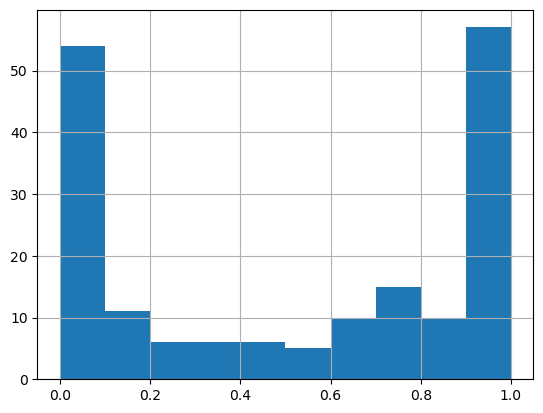

In [14]:
temp['y_train_hat_probs'].hist()

## Sensitivity Specificity Trade-off

### The Precision/Recall Trade-off

- $F_1$ favors classifiers with similar precision and recall,
- but sometimes you want **asymmetry**:

1.   <bcolor>low recall + high precision is better</bcolor>
    -   e.g. **deciding “guilty” in court**, you might prefer a model that
    -   lets many actual-guilty go free (high false negatives
        $\leftrightarrow$ low recall)...
    -   ... but has very few actual-innocent put in jail (low false
        positives $\leftrightarrow$ high precision

2.   <bcolor>high recall + low precision is better</bcolor>

Notes:
there is a trade-off between making false positive ($\rightarrow$ precision) and false negative errors ($\rightarrow$ recall).

### The Precision/Recall Trade-off
- $F_1$ favors classifiers with similar precision and recall,
- but sometimes you want **asymmetry**:

1.   <bcolor>low recall + high precision is better</bcolor>

2.   <bcolor>high recall + low precision is better</bcolor>
    -   e.g classifier to **detect bombs during flight screening**, you
        might prefer a model that:
    -   has many false alarms (low precision)...
    -   ... to minimize the number of misses (high recall).

### Classification rule

To classify individuals as positive/negative we first need to set a <bcolor>classification rule</bcolor> (cut-off), i.e., a probability $p^*$ above which we classify an individual as positive.  

Usually, we use $p^*=0.5$. 

This means that whenever $\hat{y}_i >0.5$, we would classify individual $i$ as `positive`.

**QUESTION:** Is this rule overly aggressive or passive?

### Visualisation of the trade-off using the ROC Curve

ie. *receiver operating characteristic (ROC) curve*

- A popular graphic for simultaneously displaying the types of errors for classification problems at various threshold values for $p^*$

- For each threshold $p^*$, we can compute confusion matrix –> calculate sensitivity and specificity

- The ROC curve of 
  - a completely random probability prediction is the 45 degree line
  - a perfect probability prediction would jump from zero to one and stay at one

### Visualisation of the trade-off using the ROC Curve

<div style="display: flex;">
  <div style="flex: 1; padding: 10px;">
    <!-- Content for the left column -->
    <p>ROC plots sensitivity against 1-specificity: highlights the trade-off between false-positive and true-positive error rates as the classifier threshold is varied.
</p>
  </div>
  <div style="flex: 1; padding: 10px;">
    <!-- Content for the right column -->
    <img src="images/roc.png"  style="width: 200;">

Source: ["Machine Learning with R: Expert techniques for predictive modeling"](https://www.amazon.com/Machine-Learning-techniques-predictive-modeling/dp/1784393908) 

  </div>
</div>

### ROC Curve

-   Plots *true positive rate* (recall) against the *false positive rate* ($\frac{FP}{FP + TN}$):

<div class="r-stack"><img src="images/bk-roc-curve.png" style="width: 300px;" > </div> 

- For classifications from a probabilistic prediction as the threshold is moved from 0 to 1
- x-axis: False positive rate = the proportion of FP among actual negatives
- y-axis: True positive rate = the proportion of FP among actual negatives (RECALL)

### ROC Curve and AUC

-   The Area Under (the ROC) Curve (AUC) is a popular metric ranging between:

    -   0.5

        -   **random classification**
        -   ROC curve $=$ first diagonal

    -   and 1

        -   **perfect classification**
        -   $=$ area of the square

    -   better classifier $\rightarrow$ ROC curve toward the top-left
        corner

-   Good measure for model comparison

#### Performance on the training set

In [15]:
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[78  8]
 [ 5 89]]
Training AUC: 98.1321 %
Training accuracy: 92.7778 %


### Test set

In [16]:
# Predictions on the test set
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1] # Probabilities of being in class 1

# Metrics
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print("Accuracy in test data {} vs. in train data {}".format(test_accuracy, train_accuracy) )
print("AUC in test data {} vs. in train data {}".format(test_auc_roc, train_auc_roc) )


Accuracy in test data 91.11111111111111 vs. in train data 92.77777777777779
AUC in test data 96.6 vs. in train data 98.13211281543789


In [17]:
print(classification_report(y_test, y_test_hat, digits=2))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.84      0.91        25

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



### Plot the ROC curve

In [18]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_hat_probs)
print("tresholds:",  len(threshold))
roc_auc = metrics.auc(fpr, tpr)
roc_auc

tresholds: 8


0.966

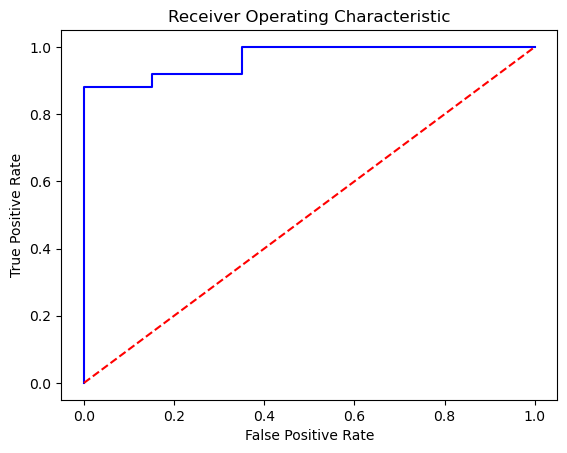

In [19]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We can further try to improve this model performance by hyperparameter tuning by changing the value of C or choosing other solvers available in `LogisticRegression()`.